# Import Libraries:

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Get The Data:

In [118]:
filepath = '/content/data.txt'

with open(filepath) as f:
  data = f.read()

print(data[:1000])

In the technological era the ability to work deeply and thoughtfully on a specific issue is becoming increasingly rare. 
The constant connectivity of individuals is a leading cause of the alarming lack of ability to go deep into a subject and it is becoming more rare each day. 
This book starts in part one by explaining the reasons for the ability to work deeply being so important, especially in today's age. 
These are: deep work is rare, valuable and meaningful. 
The idea is that the ability to think deeply is a commodity rarer than any other and as a result is becoming increasingly valuable. 
The book then discusses in part two what the leading causes for the mental rut that is keeping people from achieving the ability to think deeply and ways to get out of it.  
These are: Practice working deeply,  embrace boredom, quit social media and drain the shallows.

Part one of the book sets the concepts behind a better understanding of what deep work is and why it is so important to be able

# Preprocess The Data:

In [120]:
corpus = data.split('.')
print(corpus[0:3])

['In the technological era the ability to work deeply and thoughtfully on a specific issue is becoming increasingly rare', ' \nThe constant connectivity of individuals is a leading cause of the alarming lack of ability to go deep into a subject and it is becoming more rare each day', " \nThis book starts in part one by explaining the reasons for the ability to work deeply being so important, especially in today's age"]


In [121]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
total_words = len(word_index) + 1
print(total_words)

971


In [126]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequences = token_list[:i+1]
    input_sequences.append(n_gram_sequences)
  
max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = np.array(tf.keras.preprocessing.sequence.pad_sequences(input_sequences,
                                                                         maxlen=max_sequence_length))

print(max_sequence_length)

130


In [127]:
xs = input_sequences[:,:-1]
ys = input_sequences[:,-1]
labels = tf.keras.utils.to_categorical(ys, num_classes=total_words)

# Create The Model

In [128]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(total_words, 32, input_length=max_sequence_length),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(485, activation='relu'),
  tf.keras.layers.Dense(971, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 130, 32)           31072     
_________________________________________________________________
bidirectional (Bidirectional (None, 130, 128)          49664     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 130, 128)          98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 485)               31525     
_________________________________________________________________
dense_2 (Dense)              (None, 971)               4

In [130]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(xs, labels, epochs=100)

Epoch 1/100


92/92 [==============================] - 32s 258ms/step - loss: 6.3520 - accuracy: 0.0510
Epoch 2/100
92/92 [==============================] - 24s 258ms/step - loss: 5.9994 - accuracy: 0.0531
Epoch 3/100
92/92 [==============================] - 24s 259ms/step - loss: 5.8888 - accuracy: 0.0552
Epoch 4/100
92/92 [==============================] - 24s 259ms/step - loss: 5.7246 - accuracy: 0.0528
Epoch 5/100
92/92 [==============================] - 24s 258ms/step - loss: 5.5658 - accuracy: 0.0596
Epoch 6/100
92/92 [==============================] - 24s 258ms/step - loss: 5.4480 - accuracy: 0.0719
Epoch 7/100
92/92 [==============================] - 24s 260ms/step - loss: 5.3566 - accuracy: 0.0788
Epoch 8/100
92/92 [==============================] - 24s 259ms/step - loss: 5.2500 - accuracy: 0.0815
Epoch 9/100
92/92 [==============================] - 24s 259ms/step - loss: 5.1382 - accuracy: 0.0891
Epoch 10/100
92/92 [==============================] - 24s 258ms/step - loss: 5.0095 - accuracy

In [135]:
def plot(history, metric):
  plt.plot(history.history[metric], label=metric)
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend()

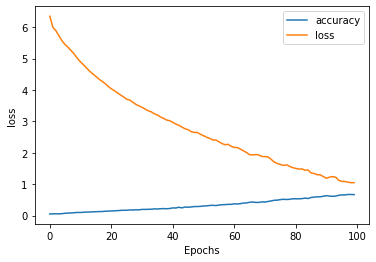

In [136]:
acc_plot = plot(history=history, metric='accuracy')
loss_plot = plot(history=history, metric='loss')

acc_plot
loss_plot

In [140]:
seed_text = 'the first time'
next_words = 25

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print()
print()
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '




the first time can maximize 12 leaving to solve yourself good what you criticize he helped the broader 7 “pursue what is meaningful not only was almost impossible
